# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket:

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [ ]:
%%info

Let's install the necessary packages here

In [ ]:
sc.install_pypi_package('pandas==1.0.5')
sc.install_pypi_package('matplotlib==3.2.1')
sc.install_pypi_package('seaborn==0.11.2')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1702413091228_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object

In [ ]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv',
                      sep=r'\t',
                      header=True)
titles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv',
                        sep=r'\t',
                        header=True)
principles = spark.read.csv(
    's3://cis9760-lecture9-movieanalysis/title.principals.tsv',
    sep=r'\t',
    header=True)
ratings = spark.read.csv(
    's3://cis9760-lecture9-movieanalysis/title.ratings.tsv',
    sep=r'\t',
    header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Display the schema below:

In [ ]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [ ]:
name.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Title Basics

Display the first 15 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [ ]:
titles.select("titleType", "primaryTitle", "genres").show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
|    short|Akrobatisches Pot...|   Documentary,Short|
|    short|The Arrival of a ...|Action,Documentar...|
|    short|The Photographica...|   Documentary,Short|
|    short|The Sprinkler Spr...|        Comedy,Short|
|    short| Autour d'une cabine|     Animation,Short|
+---------+-----------------

Display the unique titles below:

In [ ]:
titles.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [ ]:
titles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

In [ ]:
principles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 15 rows where the "category" column is "self"

In [ ]:
principles.where(principles.category == "self").show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

## Title Ratings

Display the schema below:

In [ ]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [ ]:
from pyspark.sql.types import IntegerType

ratings = ratings.withColumn("numVotes",
                             ratings["numVotes"].cast(IntegerType()))
ratings.sort(ratings.numVotes.desc()).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2159745|
|tt0468569|          9.0| 2134602|
|tt1375666|          8.8| 1892958|
|tt0137523|          8.8| 1725444|
|tt0110912|          8.9| 1695159|
|tt0109830|          8.8| 1662609|
|tt0944947|          9.4| 1606096|
|tt0133093|          8.7| 1554345|
|tt0120737|          8.8| 1548920|
|tt0167260|          8.9| 1533632|
|tt0068646|          9.2| 1482225|
|tt1345836|          8.4| 1421506|
|tt0167261|          8.7| 1387208|
|tt0816692|          8.6| 1348184|
|tt0114369|          8.6| 1327441|
+---------+-------------+--------+
only showing top 15 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [ ]:
print(f'Number of columns in Name Basics table: {len(name.columns)}')
print(f'Number of rows in Name Basics table: {name.count()}')
print('')
print(f'Number of columns in Title Basics table: {len(titles.columns)}')
print(f'Number of rows in Title Basics table: {titles.count()}')
print('')
print(f'Number of columns in Principles Basics table: {len(principles.columns)}')
print(f'Number of rows in Principles Basics table: {principles.count()}')
print('')
print(f'Number of columns in Ratings Basics table: {len(ratings.columns)}')
print(f'Number of rows in Ratings Basics table: {ratings.count()}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 9706922

Number of columns in Title Basics table: 9
Number of rows in Title Basics table: 6321302

Number of columns in Principles Basics table: 6
Number of rows in Principles Basics table: 36468817

Number of columns in Ratings Basics table: 3
Number of rows in Ratings Basics table: 993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [ ]:
titles.select("tconst", "titleType", "genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [ ]:
from pyspark.sql.functions import explode, split, col

titles_split = titles.withColumn('genre', explode(split(col('genres'), ',')))
titles_split.select("tconst", "titleType", "genre").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie title type?**

In [ ]:
movies = titles_split.filter(col('titleType') == 'movie')
movies.select('genre').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [ ]:
movies.select("genre").distinct().show(29)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

**Oops! Something is off!**

In [ ]:
movies_cleaned = movies.filter(movies.genre != "\\N")
movies_cleaned.select("genre").distinct().show(28)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [ ]:
from pyspark.sql.types import FloatType

ratings = ratings.withColumn("averageRating", col("averageRating").cast("float"))
ratings_genre_avg = movies_cleaned.join(ratings, "tconst")
ratings_genre_avg.select("genre", "averageRating").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|      genre|averageRating|
+-----------+-------------+
|    Romance|          5.4|
|Documentary|          5.2|
|       News|          5.2|
|      Sport|          5.2|
|  Biography|          6.2|
|      Drama|          6.2|
|  Biography|          6.1|
|      Crime|          6.1|
|      Drama|          6.1|
|      Drama|          4.8|
+-----------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [ ]:
from pyspark.sql.functions import avg

avg_rating_genre = ratings_genre_avg.groupBy('genre').agg(avg('averageRating').alias('avg_rating'))
avg_rating_genre.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|    Mystery|5.940437537126316|
|    Musical|6.203246053185319|
|      Sport|6.600145190943391|
|     Action|5.718734067904495|
|  Talk-Show|5.800000190734863|
|    Romance|6.125714179294426|
|   Thriller|5.625967567519544|
| Reality-TV|6.379310377712907|
|     Family|6.250560452699635|
|    Fantasy|5.924820762891499|
|    History|6.822718117193864|
|  Animation|6.326203749467441|
|  Film-Noir|6.636246780503378|
|      Short|7.259999942779541|
|     Sci-Fi|5.325150006900168|
|       News|7.200916040944689|
|      Drama|6.288080211097538|
|Documentary|7.245469805371099|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [ ]:
from pyspark.sql.functions import desc

desc_avg_ratings = avg_rating_genre.orderBy(desc('avg_rating'))
desc_avg_ratings.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|      Short|7.259999942779541|
|Documentary|7.245469805371099|
|       News|7.200916040944689|
|  Biography|6.983637643044585|
|  Game-Show|6.974999904632568|
|    History|6.822718117193864|
|      Music|6.752020207214588|
|  Film-Noir|6.636246780503378|
|      Sport|6.600145190943391|
|        War|6.483807036278403|
| Reality-TV|6.379310377712907|
|  Animation|6.326203749467441|
|      Drama|6.288080211097538|
|     Family|6.250560452699635|
|    Musical|6.203246053185319|
|    Romance|6.125714179294426|
|      Crime|6.026013333109149|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
|    Mystery|5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

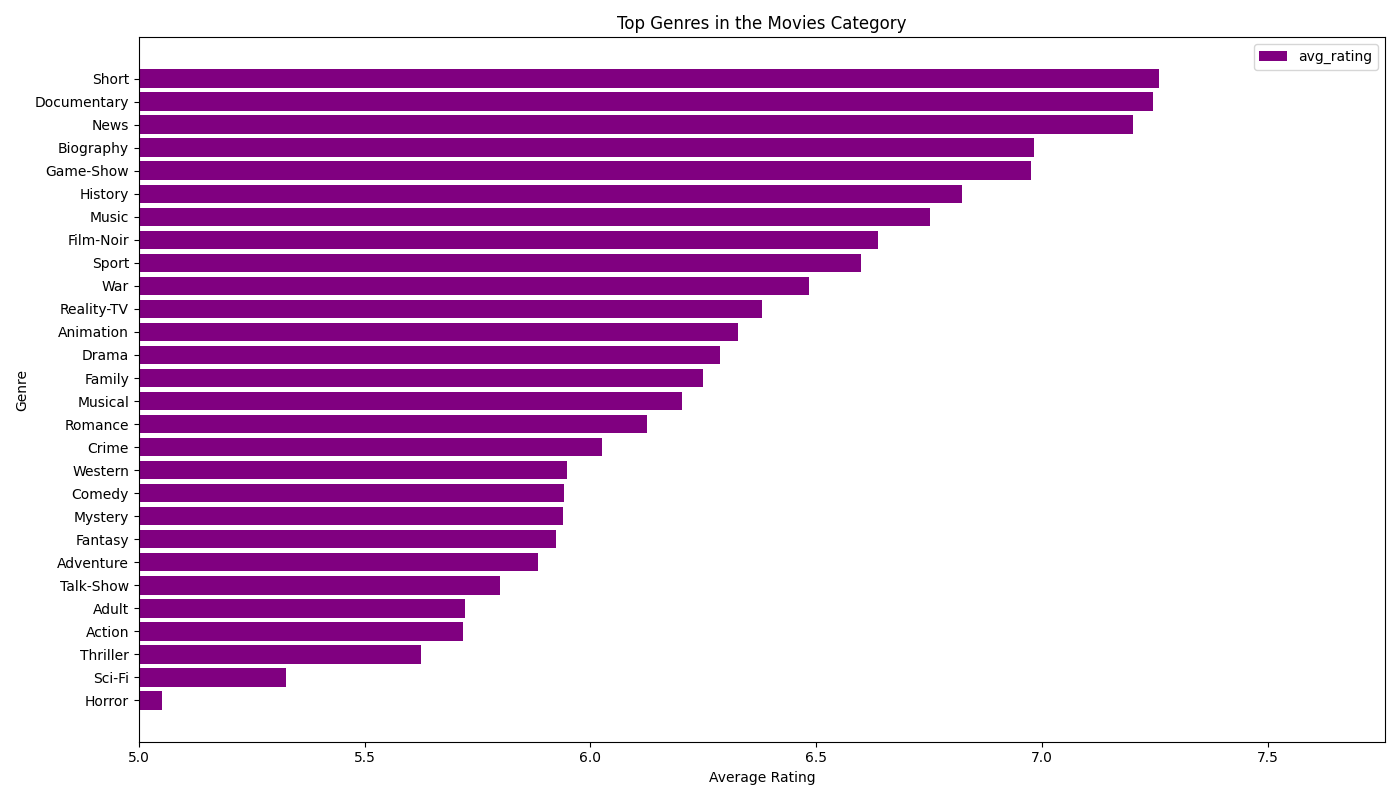

In [ ]:
average_ratings_ordered_df = desc_avg_ratings.toPandas()
plt.figure(figsize=(14, 8))
plt.barh(average_ratings_ordered_df['genre'],
         average_ratings_ordered_df['avg_rating'],
         color='purple',
         label='avg_rating')
plt.legend()
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top Genres in the Movies Category')
plt.xlim(5, average_ratings_ordered_df['avg_rating'].max() + 0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [ ]:
principles.select('tconst', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [ ]:
principles.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [ ]:
unique_jobs = principles.select('category').distinct()
unique_jobs.show(12)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [ ]:
job_categories_count = principles.groupBy('category').count()
job_categories_count.show(12)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories.

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [ ]:
top_job_categories = job_categories_count.orderBy(col('count').desc())
top_job_categories.show(12)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

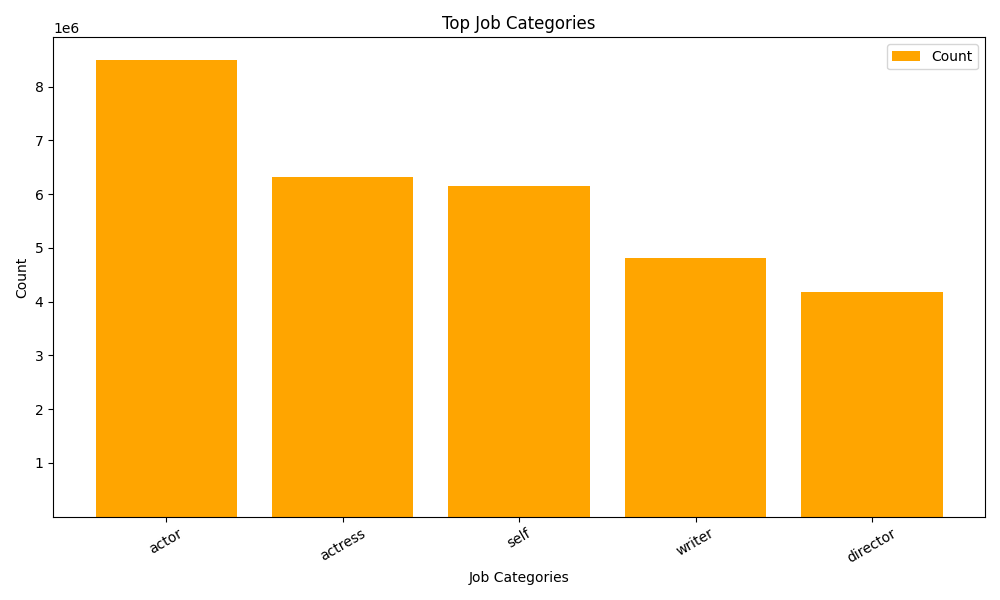

In [ ]:
top_5_job_categories = top_job_categories.limit(5)
top_5_job_categories_pd = top_5_job_categories.toPandas()
plt.figure(figsize=(10, 6))
bar_chart = plt.bar(top_5_job_categories_pd['category'],
                    top_5_job_categories_pd['count'],
                    color='orange',
                    label='Count')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.title('Top Job Categories')
plt.xticks(rotation=30)
plt.ylim(bottom=3)
plt.legend()
plt.tight_layout()
%matplot plt

# PART 4 - Answer to the following questions:

You will need to join tables to answer the following questions.
Your code should meet all the requirements given in the question.

## 1) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [ ]:
depp_nconst = name.filter(col("primaryName") == "Johnny Depp").select("nconst").distinct()
bonham_nconst = name.filter(col("primaryName") == "Helena Bonham Carter").select("nconst").distinct()
depp_movies = principles.join(depp_nconst, "nconst").select("tconst").distinct()
bonham_movies = principles.join(bonham_nconst,"nconst").select("tconst").distinct()
both_movies = depp_movies.join(bonham_movies, "tconst")
both_movies_titles = both_movies.join(titles.filter(col("titleType") == "movie"), "tconst").select("primaryTitle")
both_movies_titles.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|        primaryTitle|
+--------------------+
|        Dark Shadows|
|Sweeney Todd: The...|
|Alice Through the...|
| Alice in Wonderland|
|Charlie and the C...|
|        Corpse Bride|
+--------------------+

## 2) What are the movies in which Brad Pitt has acted since 2010?

In [ ]:
brad_pitt_nconst = name.filter(col("primaryName") == "Brad Pitt").select("nconst").distinct()
brad_pitt_actor_movies = principles.filter(col("category") == "actor").join(brad_pitt_nconst, "nconst").join(
        titles.filter((col("titleType") == "movie") & (col("startYear") > 2010)), "tconst").select("primaryTitle", "startYear")
brad_pitt_actor_movies_ordered = brad_pitt_actor_movies.orderBy(col("startYear").desc())
brad_pitt_actor_movies_ordered.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|        primaryTitle|startYear|
+--------------------+---------+
|             Babylon|     2021|
|Once Upon a Time ...|     2019|
|            Ad Astra|     2019|
|         War Machine|     2017|
|              Allied|     2016|
|       The Big Short|     2015|
|          By the Sea|     2015|
|                Fury|     2014|
|         World War Z|     2013|
|    12 Years a Slave|     2013|
| Killing Them Softly|     2012|
|    The Tree of Life|     2011|
|           Moneyball|     2011|
+--------------------+---------+

## 3) How many movies has Zendaya acted in each year?

In [ ]:
from pyspark.sql.functions import count

zendaya_nconst = name.filter(col("primaryName") == "Zendaya").select("nconst").distinct()
zendaya_movies = principles.join(zendaya_nconst, "nconst").join(titles.filter(col("titleType") == "movie"),"tconst").select("primaryTitle", "startYear")
movies_per_year = zendaya_movies.filter(zendaya_movies.startYear != "\\N").groupBy("startYear").agg(count("*").alias("count"))
ordered_movies_per_year = movies_per_year.orderBy(col("startYear").desc())
ordered_movies_per_year.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2020|    1|
|     2018|    2|
|     2017|    1|
+---------+-----+

## 4) Which movies, released in 2019, have an average rating exceeding 9.7?

In [ ]:
movies_2019 = titles.filter((col("titleType") == "movie") &(col("startYear") == 2019))
movies_2019_exceeded = movies_2019.join(ratings, "tconst").filter(col("averageRating") > 9.7).orderBy(col("averageRating").desc())
movies_2019_exceeded.select("primaryTitle", "averageRating").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|    Love in Kilnerry|         10.0|
|      A Grunt's Life|         10.0|
| The Butcher Baronet|         10.0|
|The Twilight Zone...|         10.0|
|A Medicine for th...|         10.0|
|              Kirket|         10.0|
|   L'Enfant Terrible|         10.0|
|   Our Scripted Life|         10.0|
|Bu Can Var Oldugu...|         10.0|
|        The Cardinal|          9.9|
|Puritan: All of L...|          9.9|
|         Superhombre|          9.9|
|   From Shock to Awe|          9.8|
|We Shall Not Die Now|          9.8|
|            Randhawa|          9.8|
|Kamen Rider Zi-O:...|          9.8|
|   Gini Helida Kathe|          9.8|
|     Time and motion|          9.8|
|          Square One|          9.8|
+--------------------+-------------+

## 5) Among the titles in which Clint Eastwood and Harrison Ford have acted, who has the higher average rating?

First, calculate the average rating of each actor and then show the actor with higher average rating.

In [ ]:
eastwood_nconst = name.filter(col("primaryName") == "Clint Eastwood").select("nconst").distinct()
ford_nconst = name.filter(col("primaryName") == "Harrison Ford").select("nconst").distinct()
eastwood_movies = principles.filter(col("category") == "actor").join(eastwood_nconst, "nconst").select("tconst").distinct()
ford_movies = principles.filter(col("category") == "actor").join(ford_nconst, "nconst").select("tconst").distinct()
eastwood_avg_rating = ratings.join(eastwood_movies, "tconst").agg(avg("averageRating").alias("eastwood_avg_rating"))
ford_avg_rating = ratings.join(ford_movies, "tconst").agg(avg("averageRating").alias("ford_avg_rating"))
eastwood_avg_rating_value = eastwood_avg_rating.collect()[0]["eastwood_avg_rating"]
ford_avg_rating_value = ford_avg_rating.collect()[0]["ford_avg_rating"]

if eastwood_avg_rating_value > ford_avg_rating_value:
    print(f"The average rating of Harrison Ford is {ford_avg_rating_value:.2f}")
    print(f"The average rating of Clint Eastwood is {eastwood_avg_rating_value:.2f}")
    print("Clint Eastwood has a higher average rating")
else:
    print(f"The average rating of Clint Eastwood is {eastwood_avg_rating_value:.2f}")
    print(f"The average rating of Harrison Ford is {ford_avg_rating_value:.2f}")
    print("Harrison Ford has a higher average rating")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.75
The average rating of Clint Eastwood is 7.71
Clint Eastwood has a higher average rating

## 6) What is the movie(s) with the highest average rating among those in which Chris Evans has acted?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one.

In [ ]:
from pyspark.sql.functions import max

chris_evans_nconst = name.filter(col("primaryName") == "Chris Evans").select("nconst").distinct()
chris_evans_tconst = principles.join(chris_evans_nconst,"nconst").filter(col("category") == "actor").select("tconst")
chris_evans_movie_details = chris_evans_tconst.join(titles.filter(col("titleType") == "movie"), "tconst")
chris_evans_movie_ratings = chris_evans_movie_details.join(ratings, "tconst")
highest_rating = chris_evans_movie_ratings.agg(max("averageRating")).first()[0]
highest_rated_movies = chris_evans_movie_ratings.filter(col("averageRating") == highest_rating).select("primaryTitle", "averageRating")
highest_rated_movies.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|Avengers: Infinit...|          8.5|
|   Avengers: Endgame|          8.5|
+--------------------+-------------+

## 7) What is the percentage of adult titles in which actors and actresses have acted?

In [ ]:
principles_titles = principles.join(titles, "tconst")
principles_titles_name = principles_titles.join(name, "nconst")
full_joined_data = principles_titles_name.join(ratings, "tconst")
actors_data = full_joined_data.filter(col("category") == "actor")
actresses_data = full_joined_data.filter(col("category") == "actress")
count_actors = actors_data.count()
count_actresses = actresses_data.count()
adult_actors_data = actors_data.filter(col("isAdult") == 1)
adult_actresses_data = actresses_data.filter(col("isAdult") == 1)
num_adult_actors = adult_actors_data.count()
num_adult_actresses = adult_actresses_data.count()
percentage_adult_actors = (num_adult_actors / count_actors) * 100
percentage_adult_actresses = (num_adult_actresses / count_actresses) * 100
print(f"Percentage of Adult Titles Actors Have Acted In: {percentage_adult_actors:.2f}%")
print(f"Percentage of Adult Titles Actresses Have Acted In: {percentage_adult_actresses:.2f}%")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percentage of Adult Titles Actors Have Acted In: 2.14%
Percentage of Adult Titles Actresses Have Acted In: 5.33%

## 8) What are the top 10 movie genres with the shortest average runtime?

You do not need to join tables in this question.

In [ ]:
from pyspark.sql.functions import round

movies = titles.filter(col("titleType") == "movie").withColumn("runtimeMinutes",col("runtimeMinutes").cast("integer"))
movies = movies.withColumn("genresArray", split(col("genres"), ","))
exploded_genres = movies.withColumn("genre", explode("genresArray"))
filtered_genres = exploded_genres.filter(col("genre") != "\\N")
avg_runtime_per_genre = filtered_genres.groupBy("genre").agg(round(avg("runtimeMinutes"), 2).alias("avg(runtimeMinutes)"))
top_10_shortest_avg_runtime = avg_runtime_per_genre.orderBy("avg(runtimeMinutes)").limit(10)
top_10_shortest_avg_runtime.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------------+
|      genre|avg(runtimeMinutes)|
+-----------+-------------------+
|      Short|              18.67|
|       News|              66.85|
|Documentary|              72.68|
| Reality-TV|              76.28|
|      Adult|              77.18|
|    Western|              79.36|
|  Talk-Show|              79.43|
|  Animation|              80.75|
|  Biography|              81.05|
|  Film-Noir|              83.76|
+-----------+-------------------+

## 9) What are the most common character names for actors and actresses in Romance movies?

In [ ]:
romance_movies = titles.filter(col("titleType") == "movie") \
                       .withColumn("genres_array", split(col("genres"), ",")) \
                       .withColumn("genre", explode("genres_array")) \
                       .filter(col("genre") == "Romance")
movie_principals = romance_movies.join(principles, "tconst")
actors_actresses = movie_principals.filter((col("category") == "actor") | (col("category") == "actress")).join(name, "nconst")
characters_exploded = actors_actresses.withColumn("characters_array", split(col("characters"), ",")) \
                                      .withColumn("character", explode("characters_array")) \
                                      .filter(col("character") != "\\N")
common_characters = characters_exploded.groupBy("category", "character").count().orderBy("count", ascending=False)
common_characters.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+---------+-----+
|category|character|count|
+--------+---------+-----+
| actress| ["Anna"]|  228|
|   actor|["David"]|  182|
+--------+---------+-----+
only showing top 2 rows